<div>
<img src=https://miro.medium.com/max/1400/1*jIKGJBTFpF4yVADTtldyKg.jpeg width="300">
</div>

## Predicting Churn and XG Boost Parameters


In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix
from xgboost import plot_importance, plot_tree

%matplotlib inline

In [2]:
class color:  # Testing to make the heading look a liitle more impressive
   BOLD = '\033[1m'

In [3]:
df = pd.read_csv('C:/Users/alexd/Alex Folder 1/Mini Project 3/WA_Fn-UseC_-Telco-Customer-Churn.csv')
dfbackup = df.copy()

In [4]:
# original data set that is NOT used
#names = ["Recency", "Frequency", "Monetary", "Time", "Donated"]
#df_transfusion = pd.read_csv('C:/Users/alexd/Alex Folder 1/Module 7/transfusion2.data',header=None, names=names)

In [5]:
dfbackup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
dfbackup.shape

(7043, 21)

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Initial Changes

In [8]:
# Initial a few things so made the following initial adjustments

In [9]:
mapping = {'Yes':1, 'No':0}
df['Churn'] = df['Churn'].map(mapping)


In [10]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

df = pd.get_dummies(data = df, columns = ['gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'Contract',  'PaymentMethod','PaperlessBilling'], prefix = ['gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'Contract',  'PaymentMethod','PaperlessBilling'])

In [11]:
df = pd.get_dummies(data = df, columns = ['gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'Contract',  'PaymentMethod','PaperlessBilling', 'TechSupport',  'StreamingTV', 'StreamingMovies'], prefix =['gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'Contract',  'PaymentMethod','PaperlessBilling', 'TechSupport',  'StreamingTV', 'StreamingMovies'])

In [12]:
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,PaperlessBilling_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,1,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.5,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,1,1,0,...,1,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,0,45,42.30,1840.75,0,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
4,9237-HQITU,0,2,70.70,151.65,1,1,0,1,0,...,1,1,0,0,1,0,0,1,0,0


In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [14]:
type(df['MonthlyCharges'])

pandas.core.series.Series

In [15]:
import pandas_profiling

In [16]:
#pandas_profiling.ProfileReport(df)

# EDA

In [17]:
df['TotalCharges'] 

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [18]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

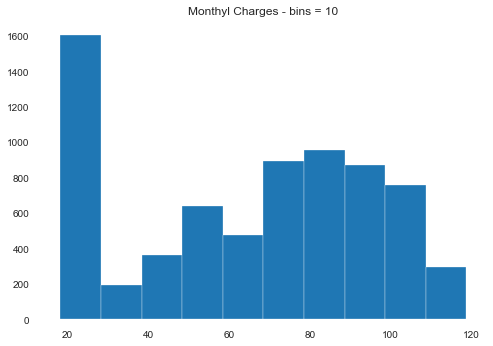

In [19]:
import matplotlib.pyplot as plt
num_bins = 10
plt.title('Monthyl Charges - bins = 10')
plt.hist(df['MonthlyCharges'], bins =num_bins)
plt.show()



In [20]:
print(df.groupby(['TotalCharges', 'Churn']))

In [21]:
df.groupby(["gender_Female", "Churn"])["TotalCharges"].count()

gender_Female  Churn
0              0        2619
               1         930
1              0        2544
               1         939
Name: TotalCharges, dtype: int64

In [22]:
df.groupby(["Churn"])["TotalCharges"].mean()

Churn
0    2555.344141
1    1531.796094
Name: TotalCharges, dtype: float64

In [23]:
df.groupby(["Churn"])["tenure"].mean()

Churn
0    37.569965
1    17.979133
Name: tenure, dtype: float64

In [24]:
df.groupby(["Churn"])["Partner_No"].mean()

Churn
0    0.471782
1    0.642055
Name: Partner_No, dtype: float64

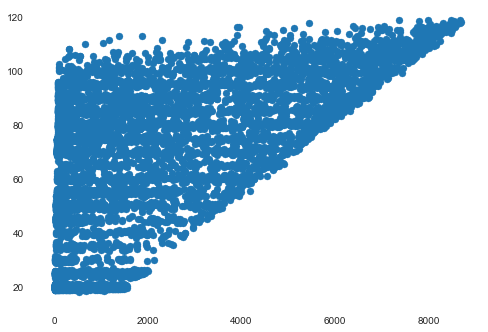

In [25]:
plt.scatter(df['TotalCharges'] , df['MonthlyCharges'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   tenure                                   7043 non-null   int64  
 3   MonthlyCharges                           7043 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   Churn                                    7043 non-null   int64  
 6   gender_Female                            7043 non-null   uint8  
 7   gender_Male                              7043 non-null   uint8  
 8   Partner_No                               7043 non-null   uint8  
 9   Partner_Yes                              7043 non-null   uint8  
 10  Dependents_No                            7043 no

In [27]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaperlessBilling_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370,0.495244,0.504756,0.516967,0.483033,0.700412,...,0.592219,0.493114,0.216669,0.290217,0.398978,0.216669,0.384353,0.395428,0.216669,0.387903
std,0.368612,24.559481,30.090047,2266.771362,0.441561,0.500013,0.500013,0.499748,0.499748,0.458110,...,0.491457,0.499988,0.412004,0.453895,0.489723,0.412004,0.486477,0.488977,0.412004,0.487307
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df.isnull().sum()

customerID                                  0
SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service

In [29]:
df.shape

(7043, 47)

In [30]:
df.dtypes.value_counts()

uint8      41
int64       3
float64     2
object      1
dtype: int64

In [31]:
df['TotalCharges'].mean()

2283.3004408418697

In [32]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
#Can also do replace or impute

In [33]:
df['TotalCharges'].isnull().sum()

0

In [34]:
# too small
#temp = df.corr()
#import seaborn as sns
#sns.heatmap(temp, annot = True)


In [35]:
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,PaperlessBilling_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,1,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,1,1,0,...,1,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,0,45,42.30,1840.75,0,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
4,9237-HQITU,0,2,70.70,151.65,1,1,0,1,0,...,1,1,0,0,1,0,0,1,0,0


In [36]:
df.shape

(7043, 47)

In [37]:
df['Churn'].shape

(7043,)

In [38]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# Preparing Data

In [39]:
# Standard data - limited X _a

In [40]:
y_a = df[['Churn']]
X_a = df[[ 'tenure','TechSupport_Yes','TechSupport_No']]

In [41]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.20, random_state=1)

In [42]:
# Standard data - All X _b

In [43]:
# For Best Results
#y_b = df[['Churn']]
#X_b = df.drop(["customerID","Churn"], axis = 1)

In [44]:
# For Not Best Results
y_b = df[['Churn']]
X_b = df.drop(["customerID","Churn", "MonthlyCharges","TotalCharges", "tenure" ], axis = 1)

In [45]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.20, random_state=1)

# Functions

In [46]:
def find_all(y_test_f,X_test_f,model_f,X_train_f, y_train_f):
    model_f.fit(X_train_f, y_train_f)
    preds = model_f.predict_proba(X_test_f)[:,1]
    fpr, tpr, thresholds  = metrics.roc_curve(y_test_f, preds)
    roc_auc = metrics.auc(fpr, tpr)
    y_pred_f = model_f.predict(X_test_f)
    cf = confusion_matrix(y_test_f, y_pred_f)
    accuracy_score_train =  model_f.score(X_train_f, y_train_f) 
    accuracy_score_test =  model_f.score(X_test_f, y_test_f)    
    return{'auc': roc_auc, 'cfm':cf ,'accuracy_score_train':accuracy_score_train , 'accuracy_score_test':accuracy_score_test}

# Logitstic regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
LogisticModel = LogisticRegression()

In [49]:
LogisticModel.fit(X_train_a, y_train_a)

C:\Users\alexd\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
print(LogisticModel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [51]:
r_sq = LogisticModel.score(X_train_a, y_train_a)
print(r_sq)

0.770855520056798


In [52]:
accuracy_score = LogisticModel.score(X_train_a, y_train_a)
print(accuracy_score)

0.770855520056798


In [53]:
accuracy_score_test = LogisticModel.score(X_test_a, y_test_a)
print(accuracy_score_test)

0.78708303761533


# XG Boost - default - limited features

In [54]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [55]:
XG_model_a = XGBClassifier(silent =0)

In [56]:
XG_model_a.fit(X_train_a, y_train_a)

C:\Users\alexd\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexd\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[08:41:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=0, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
print("XG train score ", XG_model_a.score(X_train_a, y_train_a))
print("XG test score ", XG_model_a.score(X_test_a, y_test_a))

XG train score  0.7765353212637558
XG test score  0.7906316536550745


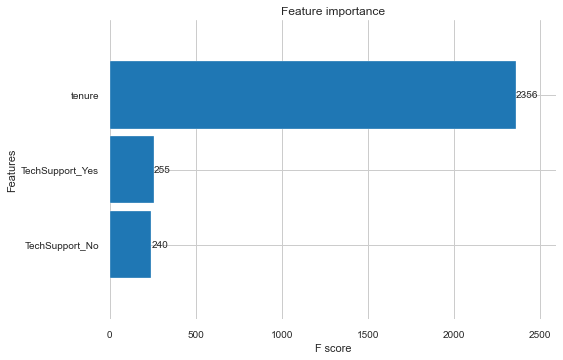

In [58]:
_ = plot_importance(XG_model_a, height=0.9)

# XG with function

In [59]:
XG_Results= find_all(y_test_a, X_test_a ,XGBClassifier(), X_train_a, y_train_a)
print(color.BOLD +"XG_Results Results ")
print ('\033[0m')

print("XG_Results AUC Test  %.2f%%" % (XG_Results['auc']* 100.0))
print(XG_Results['cfm'])
print("XG_Results accuracy_score_train  %.2f%%" % (XG_Results ['accuracy_score_train'] * 100.0))
print("XG_Results accuracy_score_test  %.2f%%" % (XG_Results ['accuracy_score_test']* 100.0))

XG_Results Results 

XG_Results AUC Test  79.69%
[[965  96]
 [199 149]]
XG_Results accuracy_score_train  77.65%
XG_Results accuracy_score_test  79.06%


# XG Boost - default - multiple feature

In [60]:
XG_model_b = XGBClassifier()

In [61]:
XG_model_b.fit(X_train_b, y_train_b)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
print("XG train score ", XG_model_b.score(X_train_b, y_train_b))
print("XG test score ", XG_model_b.score(X_test_b, y_test_b))

XG train score  0.8862264820731275
XG test score  0.7615330021291696


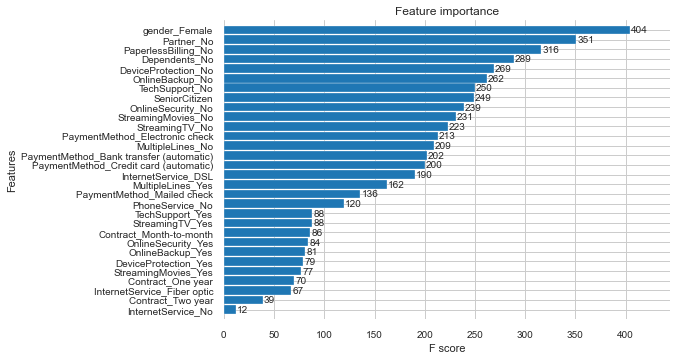

In [63]:
_ = plot_importance(XG_model_b, height=0.9)

# Set up over sampling

In [64]:
train_b2, test_b2 = train_test_split(df, test_size=0.20, random_state=1)

In [65]:
train_b2.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,PaperlessBilling_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
1814,5442-PPTJY,0,12,19.70,258.35,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5946,6261-RCVNS,0,42,73.90,3160.55,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1
3881,2176-OSJUV,0,71,65.15,4681.75,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
2389,6161-ERDGD,0,71,85.45,6300.85,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3676,2364-UFROM,0,30,70.40,2044.75,0,0,1,1,0,...,0,0,0,1,0,0,1,1,0,0


https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
https://towardsdatascience.com/probability-calibration-for-imbalanced-dataset-64af3730eaab


In [66]:
train_b2['Churn'].value_counts()

0    4113
1    1521
Name: Churn, dtype: int64

In [67]:
target_count = train_b2.Churn.value_counts()

In [68]:
print(target_count)

0    4113
1    1521
Name: Churn, dtype: int64


In [69]:
count_class_1 =target_count[1] 
count_class_0 = target_count[0]

# Divide by class

In [70]:
df_class_0 = train_b2[train_b2['Churn'] == 0]
df_class_1 = train_b2[train_b2['Churn'] == 1]

In [71]:
# Random over-sampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [72]:
print("Random over-sampling:")
df_train_over.head()

Random over-sampling:


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,PaperlessBilling_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
1814,5442-PPTJY,0,12,19.70,258.35,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
3881,2176-OSJUV,0,71,65.15,4681.75,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
2389,6161-ERDGD,0,71,85.45,6300.85,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3676,2364-UFROM,0,30,70.40,2044.75,0,0,1,1,0,...,0,0,0,1,0,0,1,1,0,0
588,0742-LAFQK,0,72,99.15,7422.10,0,0,1,0,1,...,1,1,0,0,1,0,0,0,0,1


In [73]:
df_train_over['Churn'].value_counts()

1    4113
0    4113
Name: Churn, dtype: int64

In [74]:
# Get all valriables

In [75]:
y_test_bs = test_b2  ['Churn']
X_test_bs = test_b2.drop(["customerID","Churn"], axis = 1)

y_train_bs = df_train_over[['Churn']]
X_train_bs = df_train_over.drop(["customerID","Churn"], axis = 1)


In [76]:
# XG Boost - default - multiple features = with over sampling

In [77]:
XG_model_bs = XGBClassifier()
XG_model_bs.fit(X_train_bs, y_train_bs)
print("XG train score ", XG_model_bs.score(X_train_bs, y_train_bs))
print("XG test score ", XG_model_bs.score(X_test_bs, y_test_bs))


C:\Users\alexd\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexd\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XG train score  0.950158035497204
XG test score  0.7757274662881476


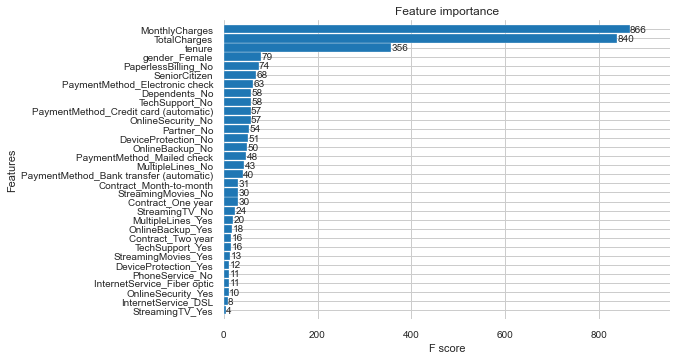

In [78]:
_ = plot_importance(XG_model_bs, height=0.9)

# Model 2
from https://xgboost.readthedocs.io/en/latest/parameter.html
https://xgboost.readthedocs.io/en/latest/python/python_intro.html#setting-parameters
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/  is Very Good
https://www.datacamp.com/community/tutorials/xgboost-in-python

In [79]:
#param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
#param['nthread'] = 4
#param['eval_metric'] = 'auc'

In [80]:
params2 = {'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 1, 'alpha': 1 } #, 'grow_policy': 'lossguide'}

In [81]:
XG_Results2= find_all(y_test_b, X_test_b ,XGBClassifier(),  X_train_b, y_train_b)
print(color.BOLD +"XG_Results Results ")
print ('\033[0m')

print("XG_Results AUC Test  %.2f%%" % (XG_Results2['auc']* 100.0))
print(XG_Results2['cfm'])
print("XG_Results accuracy_score_train  %.2f%%" % (XG_Results2 ['accuracy_score_train'] * 100.0))
print("XG_Results accuracy_score_test  %.2f%%" % (XG_Results2 ['accuracy_score_test']* 100.0))

XG_Results Results 

XG_Results AUC Test  79.55%
[[878 183]
 [153 195]]
XG_Results accuracy_score_train  88.62%
XG_Results accuracy_score_test  76.15%


# Now Multiple Run throughs

In [83]:
LearningRate = 0.1 
MaxDepth = 1
Alpha = 1
Grow_Policy = 'lossguide'
ColSampleByTree = 0.1
MaximumDepth = 1 #'alpha'
Colsample_bytree = 0.3 
Colsample_bylevel = 0.3 
Colsample_bynode = 0.3
TreeMethod = 'auto'
Process_type = 'default'



for i in range(1,7,1):

    XG_Results2= find_all(y_test_b, X_test_b ,XGBClassifier( learning_rate= LearningRate,process_type= Process_type, colsample_bytree= Colsample_bytree, max_depth= MaxDepth , grow_policy= Grow_Policy, colsample_bylevel= Colsample_bylevel , colsample_bynode= Colsample_bynode , tree_method= TreeMethod , verbosity = 1),  X_train_b, y_train_b)

    
    #process_type= Process_type ,

    ## Below is Printing
    print(color.BOLD +" ", i ,") XG_Results")
    print ('\033[0m')
    print(" ")
    print( "learning_rate",  LearningRate) 
    print("process_type ", Process_type)
    print("max_depth", MaxDepth)
    print( "grow_policy",  Grow_Policy)
    print("tree_method",  TreeMethod)
    print( "colsample_bytree", Colsample_bytree, "colsample_bylevel", Colsample_bylevel , "colsample_bynode", Colsample_bynode )
    print(" ")
    print("XG_Results AUC Test  %.2f%%" % (XG_Results2['auc']* 100.0))
    print(XG_Results2['cfm'])
    print("XG_Results accuracy_score_train  %.2f%%" % (XG_Results2 ['accuracy_score_train'] * 100.0))
    print("XG_Results accuracy_score_test  %.2f%%" % (XG_Results2 ['accuracy_score_test']* 100.0))
    print(" ")
    
    # Every time we go through change values
    LearningRate += 0.1
    MaxDepth +=1
    ColSampleByTree +=0.1
    Alpha +=1
    Colsample_bytree = Colsample_bytree +0.1
    Colsample_bylevel = Colsample_bylevel +0.1
    Colsample_bynode = Colsample_bynode +0.1
    if i == 1:
        MaximumDepth = 1
        TreeMethod = 'exact'
     
    if i > 1:
        Grow_Policy = 'depthwise'
        MaximumDepth += 1
        TreeMethod = 'approx'
        Updater = 'prune'

        


  1 ) XG_Results

 
learning_rate 0.1
process_type  default
max_depth 1
grow_policy lossguide
tree_method auto
colsample_bytree 0.3 colsample_bylevel 0.3 colsample_bynode 0.3
 
XG_Results AUC Test  83.80%
[[1009   52]
 [ 232  116]]
XG_Results accuracy_score_train  76.89%
XG_Results accuracy_score_test  79.84%
 
  2 ) XG_Results

 
learning_rate 0.2
process_type  default
max_depth 2
grow_policy lossguide
tree_method exact
colsample_bytree 0.4 colsample_bylevel 0.4 colsample_bynode 0.4
 
XG_Results AUC Test  84.44%
[[941 120]
 [159 189]]
XG_Results accuracy_score_train  79.02%
XG_Results accuracy_score_test  80.20%
 
  3 ) XG_Results

 
learning_rate 0.30000000000000004
process_type  default
max_depth 3
grow_policy depthwise
tree_method approx
colsample_bytree 0.5 colsample_bylevel 0.5 colsample_bynode 0.5
 
XG_Results AUC Test  83.27%
[[930 131]
 [159 189]]
XG_Results accuracy_score_train  80.05%
XG_Results accuracy_score_test  79.42%
 
  4 ) XG_Results

 
learning_rate 0.4
process_type

In [ ]:
# Only Changing 1 variable

In [103]:
LearningRate = 0.1 
MaxDepth = 1
Alpha = 1
Grow_Policy = 'lossguide'
ColSampleByTree = 0.1
MaximumDepth = 1 #'alpha'
Colsample_bytree = 0.3 
Colsample_bylevel = 0.3 
Colsample_bynode = 0.3
TreeMethod = 'auto'
Process_type = 'default'



for i in range(1,7,1):

    XG_Results2= find_all(y_test_b, X_test_b ,XGBClassifier( learning_rate= LearningRate,process_type= Process_type,  colsample_bytree= Colsample_bytree, max_depth= MaxDepth , grow_policy= Grow_Policy, colsample_bylevel= Colsample_bylevel , colsample_bynode= Colsample_bynode , tree_method= TreeMethod , verbosity = 1),  X_train_b, y_train_b)

    
    #process_type= Process_type ,

    ## Below is Printing
    print(color.BOLD +" ", i ,") XG_Results")
    print ('\033[0m')
    print(" ")
    print( "learning_rate",  LearningRate) 
    print("process_type ", Process_type)
    print("max_depth", MaxDepth)
    print( "grow_policy",  Grow_Policy)
    print("tree_method",  TreeMethod)
    print( "colsample_bytree", Colsample_bytree, "colsample_bylevel", Colsample_bylevel , "colsample_bynode", Colsample_bynode )
    print(" ")
    print("XG_Results AUC Test  %.2f%%" % (XG_Results2['auc']* 100.0))
    print(XG_Results2['cfm'])
    print("XG_Results accuracy_score_train  %.2f%%" % (XG_Results2 ['accuracy_score_train'] * 100.0))
    print("XG_Results accuracy_score_test  %.2f%%" % (XG_Results2 ['accuracy_score_test']* 100.0))
    print(" ")
    
    # Every time we go through change values
    LearningRate += 0.1
    #MaxDepth +=1
    #ColSampleByTree +=0.1
    #Alpha +=1
    #Colsample_bytree = Colsample_bytree +0.1
    #Colsample_bylevel = Colsample_bylevel +0.1
    #Colsample_bynode = Colsample_bynode +0.1
    if i == 1:
        irrelevant = 1
    #    MaximumDepth = 1
    #    TreeMethod = 'exact'
     
    if i > 1:
        irrelevant = 2
     #   Grow_Policy = 'depthwise'
     #   MaximumDepth += 1
     #   TreeMethod = 'approx'
     #   Updater = 'prune'

        


  1 ) XG_Results

 
learning_rate 0.1
process_type  default
max_depth 1
grow_policy lossguide
tree_method auto
colsample_bytree 0.3 colsample_bylevel 0.3 colsample_bynode 0.3
 
XG_Results AUC Test  83.80%
[[1009   52]
 [ 232  116]]
XG_Results accuracy_score_train  76.89%
XG_Results accuracy_score_test  79.84%
 
  2 ) XG_Results

 
learning_rate 0.2
process_type  default
max_depth 1
grow_policy lossguide
tree_method auto
colsample_bytree 0.3 colsample_bylevel 0.3 colsample_bynode 0.3
 
XG_Results AUC Test  84.41%
[[956 105]
 [170 178]]
XG_Results accuracy_score_train  78.04%
XG_Results accuracy_score_test  80.48%
 
  3 ) XG_Results

 
learning_rate 0.30000000000000004
process_type  default
max_depth 1
grow_policy lossguide
tree_method auto
colsample_bytree 0.3 colsample_bylevel 0.3 colsample_bynode 0.3
 
XG_Results AUC Test  84.62%
[[939 122]
 [162 186]]
XG_Results accuracy_score_train  78.24%
XG_Results accuracy_score_test  79.84%
 
  4 ) XG_Results

 
learning_rate 0.4
process_type  d

# One Run Through Only

In [85]:
XG_model2 = XGBClassifier(colsample_bytree= 0.5, learning_rate= 0.1, max_depth= 2, grow_policy= 'depthwise', colsample_bylevel= 0.3, colsample_bynode= 0.6, tree_method= 'approx',  process_type= 'default', verbosity = 1)

In [86]:
XG_model2.fit(X_train_b, y_train_b)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.3,
              colsample_bynode=0.6, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic',
              process_type='default', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='approx',
              validate_parameters=1, verbosity=1)

In [87]:
print("XG train score ", XG_model2.score(X_train_b, y_train_b))
print("XG test score ", XG_model2.score(X_test_b, y_test_b))

XG train score  0.7891373801916933
XG test score  0.7963094393186657


In [88]:
XG_preds_prob = XG_model2.predict_proba(X_test_b)
XG_preds = XG_model2.predict(X_test_b)

In [89]:
Predictions= XG_preds_prob[:,1]

In [90]:
cf = confusion_matrix(y_test_b, XG_preds)

In [91]:
fpr, tpr, thresholds  = metrics.roc_curve(y_test_b, Predictions)

In [92]:
roc_auc = metrics.auc(fpr, tpr)

In [93]:
print(roc_auc)

0.8415938119535896


In [94]:
print("XG_Results AUC Test" , roc_auc )
print(XG_Results2['cfm'])
print("XG_Results accuracy_score_train " ,XG_model2.score(X_train_b, y_train_b))
print("XG_Results accuracy_score_test" , XG_model2.score(X_test_b, y_test_b))

XG_Results AUC Test 0.8415938119535896
[[933 128]
 [158 190]]
XG_Results accuracy_score_train  0.7891373801916933
XG_Results accuracy_score_test 0.7963094393186657


In [95]:
#UP TO HERE DONE BY FUNCTION

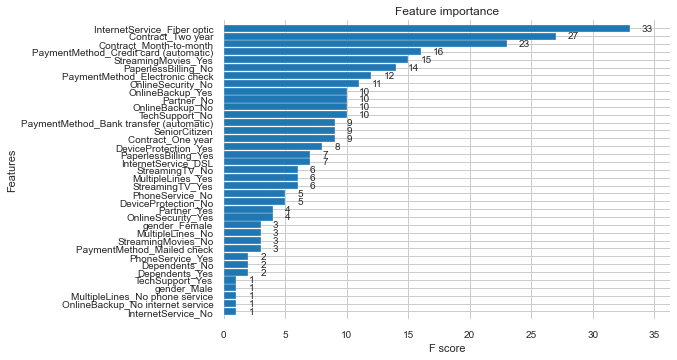

In [96]:
_ = plot_importance(XG_model2, height=0.9)

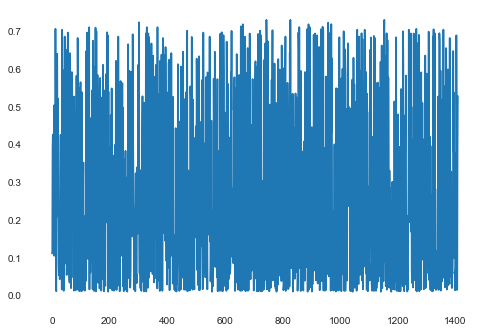

In [97]:
plt.plot(Predictions)

# Grid search or CV

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
xgb_modecv = XGBClassifier()

In [100]:
test_params = {
 'max_depth':[2,4,8,12]
}


In [101]:
model = GridSearchCV(estimator = xgb_modecv,param_grid = test_params)

In [102]:
model.fit(X_train_b,y_train_b)


C:\Users\alexd\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexd\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...s=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,


In [104]:
print (model.best_params_)

{'max_depth': 2}
